In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, '../../aaai18/code/')
from common import *

In [3]:
pred = pickle.load(open('./results/pred_loo.pkl', 'r'))
pred_validation = pickle.load(open('./results/pred_validation_loo.pkl', 'r'))
H = pickle.load(open('./results/H_loo.pkl', 'r'))
A = pickle.load(open('./results/A_loo.pkl', 'r'))
T = pickle.load(open('./results/T_loo.pkl', 'r'))
weight_matrix = pickle.load(open('./results/weight_matrices_loo.pkl', 'r'))


In [10]:
test_ix = [5109, 9922, 9278, 59, 9771, 5809]
validate_ix = [8669, 9356, 5673, 77, 7510, 9938]

In [11]:
out_v = {}
for iteration in range(10):
    out_v[iteration] = {}
    for appliance in APPLIANCES_ORDER[1:]:
        s = pd.concat(pred_validation[iteration][appliance]).loc[validate_ix]
        if appliance=="hvac":
            out_v[iteration][appliance] = compute_rmse_fraction(appliance,s[range(4, 10)], 'Austin')[2]
        else:   
            out_v[iteration][appliance] = compute_rmse_fraction(appliance, s, 'Austin')[2]

In [12]:
out = {}
for iteration in range(10):
    out[iteration] = {}
    for appliance in APPLIANCES_ORDER[1:]:
        s = pd.concat(pred[iteration][appliance]).loc[test_ix]
        if appliance=="hvac":
            out[iteration][appliance] = compute_rmse_fraction(appliance,s[range(4, 10)], 'Austin')[2]
        else:   
            out[iteration][appliance] = compute_rmse_fraction(appliance, s, 'Austin')[2]

In [16]:
df_out = pd.DataFrame(out)

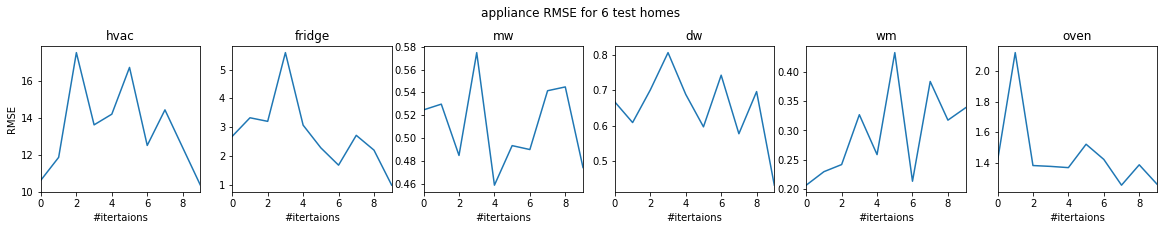

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20,3))
ax = axes.flatten()
count = 0
mean_out = pd.DataFrame(out)
       
for appliance in APPLIANCES_ORDER[1:]:
#     mean_out_v['same']['max'].T[appliance].plot(ax = ax[count], title=appliance)
    mean_out.T[appliance].plot(ax = ax[count], title=appliance)

    
    ax[count].set_xlabel("#itertaions")
    count += 1
ax[0].set_ylabel("RMSE")
plt.suptitle("appliance RMSE for 6 test homes")
fig.subplots_adjust(top=0.8)
plt.savefig("./figures/appliance_RMSE_loo_test.pdf", format='pdf')

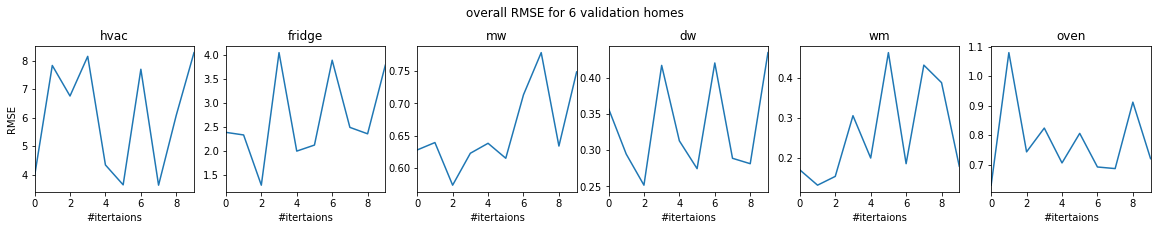

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20,3))
ax = axes.flatten()
count = 0
mean_out_v = pd.DataFrame(out_v)
       
for appliance in APPLIANCES_ORDER[1:]:
#     mean_out_v['same']['max'].T[appliance].plot(ax = ax[count], title=appliance)
    mean_out_v.T[appliance].plot(ax = ax[count], title=appliance)

    
    ax[count].set_xlabel("#itertaions")
    count += 1
ax[0].set_ylabel("RMSE")
plt.suptitle("overall RMSE for 6 validation homes")
fig.subplots_adjust(top=0.8)
plt.savefig("./figures/appliance_rmse_loo_validation.pdf", format='pdf')

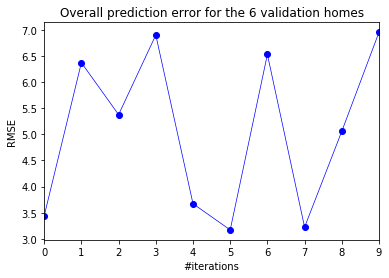

In [31]:
fig, ax = plt.subplots()
error_v = {}
error_v = (mean_out_v.T*pd.Series(contri['Austin'])).sum(axis=1)
error_v.plot(label='all', marker='o', ax=ax, linewidth=0.7,  color=['b'])

ax.set_xlabel("#iterations")
ax.set_ylabel("RMSE")
ax.set_title("Overall prediction error for the 6 validation homes")
plt.savefig("overall-RMSE_loo_validate.pdf", format='pdf')

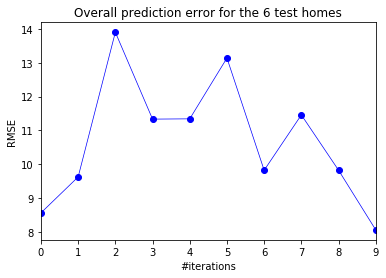

In [32]:
fig, ax = plt.subplots()
error = {}
error = (mean_out.T*pd.Series(contri['Austin'])).sum(axis=1)
error.plot(label='all', marker='o', ax=ax, linewidth=0.7,  color=['b'])

ax.set_xlabel("#iterations")
ax.set_ylabel("RMSE")
ax.set_title("Overall prediction error for the 6 test homes")
plt.savefig("overall-RMSE_loo_test.pdf", format='pdf')